In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../fem')
from ManufacturedSolutionsDarcy import *

In [2]:
%load_ext autoreload
%autoreload 2

In [27]:
dataset = MFSetDarcy(N_samples=10000, d=2, l_min=0.5, l_max=1)

In [28]:
X, Y = np.mgrid[0:1:100*1j, 0:1:100*1j]
x = np.vstack([X.ravel(), Y.ravel()]).T

In [29]:
u = dataset.u
us = []
for i in range(len(u)):
    us.append(u[i](x))
us = np.array(us)

theta = dataset.theta
thetas = []
for i in range(len(theta)):
    thetas.append(theta[i](x))
thetas = np.array(thetas)



In [30]:
U, Sigma, Vstar = np.linalg.svd(us)

In [31]:
thetas<0

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

In [32]:
us_positive = us[(np.sum(thetas<0, axis=-1)==0)]

In [33]:
us_positive.shape

(7667, 10000)

In [34]:
U, Sigma_positive, Vstar = np.linalg.svd(us_positive)

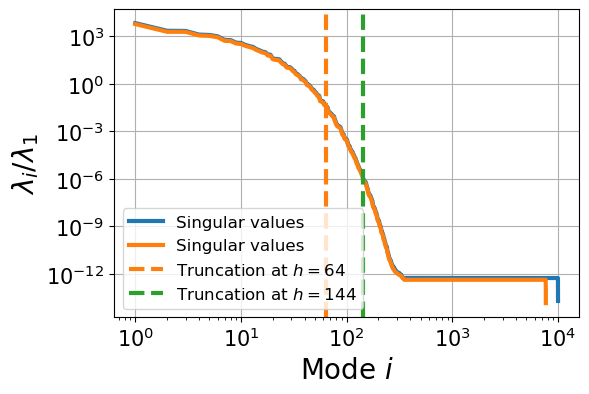

In [38]:
size_title = 25
size_ticklabels = 15
size_axeslabels = 20

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

ax.plot(np.linspace(1,len(Sigma),len(Sigma)),Sigma, linewidth=3, label='Singular values')
ax.plot(np.linspace(1,len(Sigma_positive),len(Sigma_positive)),Sigma_positive, linewidth=3, label='Singular values')
ax.axvline(64, 0, 1, linewidth=3, linestyle='--', label='Truncation at $h=64$', color='C1')
ax.axvline(144, 0, 1, linewidth=3, linestyle='--', label='Truncation at $h=144$', color='C2')
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'Mode $i$', fontsize=size_axeslabels)
ax.set_ylabel(r'$\lambda_i/\lambda_1$', fontsize=size_axeslabels)
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(fontsize=12)
# ax.set_ylim(1e-6,1)
# ax.set_xlim(1,1e3)
ax.grid()

plt.savefig("eigenvaluedecay.svg", bbox_inches='tight')#, transparent=True)

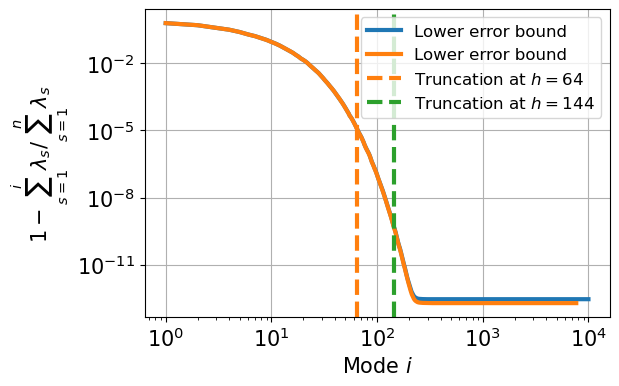

In [37]:
size_title = 25
size_ticklabels = 15
size_axeslabels = 15

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

ax.plot(np.linspace(1,len(Sigma),len(Sigma)),1- np.cumsum(Sigma)/np.sum(Sigma), linewidth=3, label='Lower error bound')
ax.plot(np.linspace(1,len(Sigma_positive),len(Sigma_positive)),1- np.cumsum(Sigma_positive)/np.sum(Sigma_positive), linewidth=3, label='Lower error bound')
ax.axvline(64, 0, 1, linewidth=3, linestyle='--', label='Truncation at $h=64$', color='C1')
ax.axvline(144, 0, 1, linewidth=3, linestyle='--', label='Truncation at $h=144$', color='C2')
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'Mode $i$', fontsize=size_axeslabels)
ax.set_ylabel(r'$1- \sum_{s=1}^i\lambda_s/\sum_{s=1}^n\lambda_s$', fontsize=size_axeslabels)
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(1e-8,1)
# ax.set_xlim(1e0,1e3)
ax.legend(fontsize=12)
ax.grid()

plt.savefig("errorbound.svg", bbox_inches='tight')#, transparent=True)